In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier, XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re


book_data = pd.read_csv('books_data.csv')
book_ratings = pd.read_csv('Books_rating.csv')

## Looking at the Data

In [2]:
book_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [3]:
book_ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [4]:
book_ratings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  3000000 non-null  object 
 1   Title               2999792 non-null  object 
 2   Price               481171 non-null   float64
 3   User_id             2438213 non-null  object 
 4   profileName         2438114 non-null  object 
 5   review/helpfulness  3000000 non-null  object 
 6   review/score        3000000 non-null  float64
 7   review/time         3000000 non-null  int64  
 8   review/summary      2999962 non-null  object 
 9   review/text         2999992 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [5]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212404 entries, 0 to 212403
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          212403 non-null  object 
 1   description    143962 non-null  object 
 2   authors        180991 non-null  object 
 3   image          160329 non-null  object 
 4   previewLink    188568 non-null  object 
 5   publisher      136518 non-null  object 
 6   publishedDate  187099 non-null  object 
 7   infoLink       188568 non-null  object 
 8   categories     171205 non-null  object 
 9   ratingsCount   49752 non-null   float64
dtypes: float64(1), object(9)
memory usage: 16.2+ MB


In [6]:
book_data.isna().sum()

Title                 1
description       68442
authors           31413
image             52075
previewLink       23836
publisher         75886
publishedDate     25305
infoLink          23836
categories        41199
ratingsCount     162652
dtype: int64

In [7]:
book_ratings.isna().sum()

Id                          0
Title                     208
Price                 2518829
User_id                561787
profileName            561886
review/helpfulness          0
review/score                0
review/time                 0
review/summary             38
review/text                 8
dtype: int64

<Figure size 1400x1000 with 0 Axes>

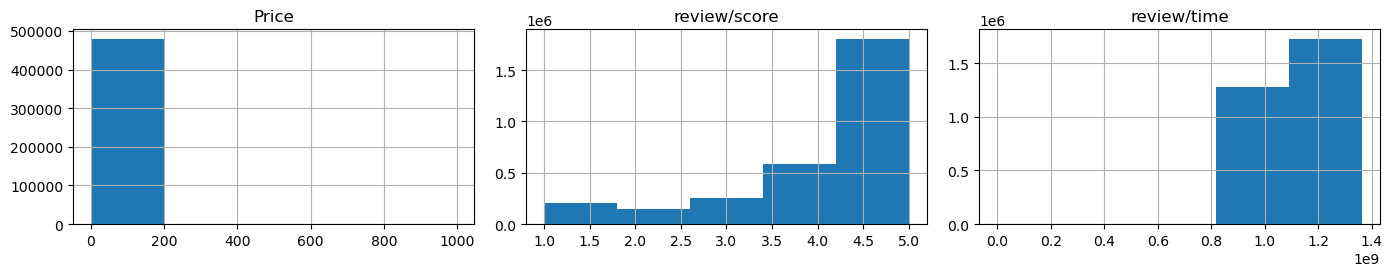

In [8]:
# Visualize distributions of numerical features
plt.figure(figsize=(14, 10))
book_ratings.hist(bins=5, figsize=(14, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

## Cleaning the book_data

In [9]:
book_data = book_data.drop(columns=['image', 'ratingsCount'])


In [10]:
book_data['description'] = book_data['description'].fillna('Unknown')
book_data['authors'] = book_data['authors'].fillna('Unknown')
book_data['publisher'] = book_data['publisher'].fillna('Unknown')
book_data['categories'] = book_data['categories'].fillna('Uncategorized')

In [11]:
book_data['Title'] = book_data['Title'].str.strip().str.title()
book_data['authors'] = book_data['authors'].str.strip().str.title()
book_data['publisher'] = book_data['publisher'].str.strip().str.title()
book_data['description'] = book_data['description'].str.strip().str.lower()


In [12]:
book_data = book_data.dropna(subset=['publishedDate'])
book_data['publishedDate'] = pd.to_datetime(book_data['publishedDate'], errors='coerce')

In [13]:
book_data = book_data.drop_duplicates()

In [14]:
book_data.head()

,Title,description,authors,previewLink,publisher,publishedDate,infoLink,categories
0,Its Only Art If Its Well Hung!,unknown,['Julie Strain'],http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,1996-01-01 00:00:00,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,philip nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01 00:00:00,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography']
2,Wonderful Worship In Smaller Churches,this resource includes twelve principles in un...,['David R. Ray'],http://books.google.nl/books?id=2tsDAAAACAAJ&d...,Unknown,2000-01-01 00:00:00,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion']
3,Whispers Of The Wicked Saints,julia thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.nl/books?id=aRSIgJlq6JwC&d...,Iuniverse,2005-02-01 00:00:00,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction']
4,"Nation Dance: Religion, Identity And Cultural ...",unknown,['Edward Long'],http://books.google.nl/books?id=399SPgAACAAJ&d...,Unknown,2003-03-01 00:00:00,http://books.google.nl/books?id=399SPgAACAAJ&d...,Uncategorized


In [15]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187097 entries, 0 to 212403
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Title          187096 non-null  object
 1   description    187097 non-null  object
 2   authors        187097 non-null  object
 3   previewLink    187097 non-null  object
 4   publisher      187097 non-null  object
 5   publishedDate  186780 non-null  object
 6   infoLink       187097 non-null  object
 7   categories     187097 non-null  object
dtypes: object(8)
memory usage: 12.8+ MB


## Cleaning the book_ratings

In [16]:
book_ratings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  3000000 non-null  object 
 1   Title               2999792 non-null  object 
 2   Price               481171 non-null   float64
 3   User_id             2438213 non-null  object 
 4   profileName         2438114 non-null  object 
 5   review/helpfulness  3000000 non-null  object 
 6   review/score        3000000 non-null  float64
 7   review/time         3000000 non-null  int64  
 8   review/summary      2999962 non-null  object 
 9   review/text         2999992 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 228.9+ MB


In [17]:
book_ratings['Title'] = book_ratings['Title'].fillna('Unknown')
book_ratings['User_id'] = book_ratings['User_id'].fillna('Unknown')
book_ratings['profileName'] = book_ratings['profileName'].fillna('Unknown')
book_ratings['review/summary'] = book_ratings['review/summary'].fillna('No Summary')
book_ratings['review/text'] = book_ratings['review/text'].fillna('No Review')

In [18]:
book_ratings['Title'] = book_ratings['Title'].str.strip().str.title()
book_ratings['profileName'] = book_ratings['profileName'].str.strip().str.title()
book_ratings['review/summary'] = book_ratings['review/summary'].str.strip().str.lower()
book_ratings['review/text'] = book_ratings['review/text'].str.strip().str.lower()

In [19]:
book_ratings = book_ratings.drop(columns=['Price'])

In [20]:
book_ratings = book_ratings.drop(columns=['review/time'])

In [21]:
book_ratings.head()

,Id,Title,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,AVCGYZL8FQQTD,"Jim Of Oz ""Jim-Of-Oz""",7/7,4.0,nice collection of julie strain images,this is only for julie strain fans. it's a col...
1,0826414346,Dr. Seuss: American Icon,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,really enjoyed it,i don't care much for dr. seuss but after read...
2,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,John Granger,10/11,5.0,essential for every personal and public library,"if people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,A2MVUWT453QH61,"Roy E. Perry ""Amateur Philosopher""",7/7,4.0,phlip nel gives silly seuss a serious treatment,"theodore seuss geisel (1904-1991), aka &quot;d..."
4,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,"D. H. Richards ""Ninthwavestore""",3/3,4.0,good academic overview,philip nel - dr. seuss: american iconthis is b...


In [22]:
book_ratings.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 8 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Id                  3000000 non-null  object 
 1   Title               3000000 non-null  object 
 2   User_id             3000000 non-null  object 
 3   profileName         3000000 non-null  object 
 4   review/helpfulness  3000000 non-null  object 
 5   review/score        3000000 non-null  float64
 6   review/summary      3000000 non-null  object 
 7   review/text         3000000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 183.1+ MB


## Merging the datasets and saving the newly made dataset

In [23]:
book_merged = pd.merge(book_data, book_ratings, on='Title', how='inner')

In [24]:
book_merged.head()

,Title,description,authors,previewLink,publisher,publishedDate,infoLink,categories,Id,User_id,profileName,review/helpfulness,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,unknown,['Julie Strain'],http://books.google.nl/books?id=DykPAAAACAAJ&d...,Unknown,1996-01-01 00:00:00,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],1882931173,AVCGYZL8FQQTD,"Jim Of Oz ""Jim-Of-Oz""",7/7,4.0,nice collection of julie strain images,this is only for julie strain fans. it's a col...
1,Dr. Seuss: American Icon,philip nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01 00:00:00,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0826414346,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,really enjoyed it,i don't care much for dr. seuss but after read...
2,Dr. Seuss: American Icon,philip nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01 00:00:00,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0826414346,A3UH4UZ4RSVO82,John Granger,10/11,5.0,essential for every personal and public library,"if people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,philip nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01 00:00:00,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0826414346,A2MVUWT453QH61,"Roy E. Perry ""Amateur Philosopher""",7/7,4.0,phlip nel gives silly seuss a serious treatment,"theodore seuss geisel (1904-1991), aka &quot;d..."
4,Dr. Seuss: American Icon,philip nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01 00:00:00,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],0826414346,A22X4XUPKF66MR,"D. H. Richards ""Ninthwavestore""",3/3,4.0,good academic overview,philip nel - dr. seuss: american iconthis is b...


In [25]:
book_merged.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2914266 entries, 0 to 2914265
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Title               2914266 non-null  object 
 1   description         2914266 non-null  object 
 2   authors             2914266 non-null  object 
 3   previewLink         2914266 non-null  object 
 4   publisher           2914266 non-null  object 
 5   publishedDate       2911290 non-null  object 
 6   infoLink            2914266 non-null  object 
 7   categories          2914266 non-null  object 
 8   Id                  2914266 non-null  object 
 9   User_id             2914266 non-null  object 
 10  profileName         2914266 non-null  object 
 11  review/helpfulness  2914266 non-null  object 
 12  review/score        2914266 non-null  float64
 13  review/summary      2914266 non-null  object 
 14  review/text         2914266 non-null  object 
dtypes: float64(1), 

In [31]:
from sklearn.utils import resample

desired_sample_size = 30000

class_counts = book_merged['review/score'].value_counts()

# Sample the same amount of rows for each class
sampled_dfs = []

for cls in class_counts.index:
    class_df = book_merged[book_merged['review/score'] == cls]
    sample_size = min(desired_sample_size, class_counts[cls])
    sampled_df = resample(class_df, replace=False, n_samples=sample_size, random_state=42)
    sampled_dfs.append(sampled_df)

# Concatenate the samples to form the final sampled dataset
balanced_data = pd.concat(sampled_dfs)

# Shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(balanced_data['review/score'].value_counts())

4.0    30000
5.0    30000
2.0    30000
1.0    30000
3.0    30000
Name: review/score, dtype: int64


In [32]:
balanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Title               150000 non-null  object 
 1   description         150000 non-null  object 
 2   authors             150000 non-null  object 
 3   previewLink         150000 non-null  object 
 4   publisher           150000 non-null  object 
 5   publishedDate       149861 non-null  object 
 6   infoLink            150000 non-null  object 
 7   categories          150000 non-null  object 
 8   Id                  150000 non-null  object 
 9   User_id             150000 non-null  object 
 10  profileName         150000 non-null  object 
 11  review/helpfulness  150000 non-null  object 
 12  review/score        150000 non-null  float64
 13  review/summary      150000 non-null  object 
 14  review/text         150000 non-null  object 
dtypes: float64(1), object(14)
memory u

In [34]:
balanced_data.to_csv('balanced_data')